Evidence that convergence of added mass in the innermost region is independent of m0 and h. It is only dependent on (h-d) and radial width of each region.

This data is for 2 geometries (wrt h-d and radwidths). Each geometry has one data set varying m0 and one varying h, for a total of 4 data sets.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [2]:
def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max, region = 0):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0s[0], rho)
  mks = [prob.m_k]
  for m0 in m0s[1:]:
    prob.change_m0(m0)
    mks.append(prob.m_k)
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : m0s}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, m0s, mks))

dim1s = {"h" : lambda data_dict, m0: data_dict["h"],
        "(1/m0)" : lambda data_dict, m0: 1/m0}

In [ ]:
file1 = "data/predetermined-7.pkl"
radwidth0, radwidth1, radwidth2 = 1, 2, 2
big_nmk, nmk_max = 200, 150
heaving, NMK, rho = [1, 0, 0], [big_nmk] * 4, 1023

m0s = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
hs = [35, 40, 50, 75, 100]

def generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2):
  radwidths = [radwidth0, radwidth1, radwidth2]
  hmds = [hmd0, hmd1, hmd2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
    assert radwidths[i] > 0
  return d, a

# hmd0, hmd1, hmd2 = 20, 25, 30
# all_prob_sets = [[], [], [], []]

# h = 40
# d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
# all_prob_sets[0].append(solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 0.")

# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[1].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 1.")

# hmd0, hmd1, hmd2 = 30, 25, 20
# h = 40
# d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
# all_prob_sets[2].append(solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 2.")

# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[3].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 3.")


In [4]:
all_prob_sets = open_pkl_file(file1)
for subset in all_prob_sets:
  generate_convergence_data(subset, [0.01, 0.005])
  generate_log_data(subset)

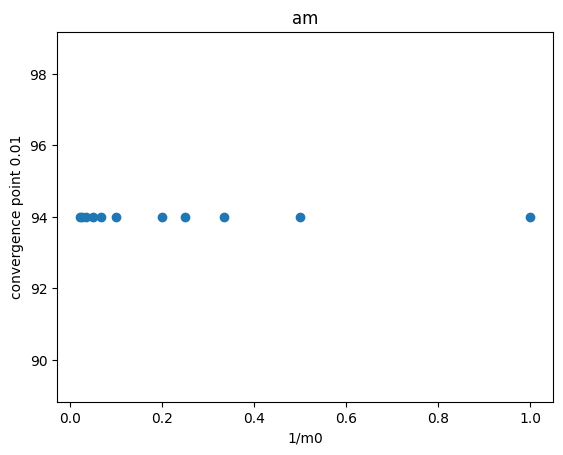

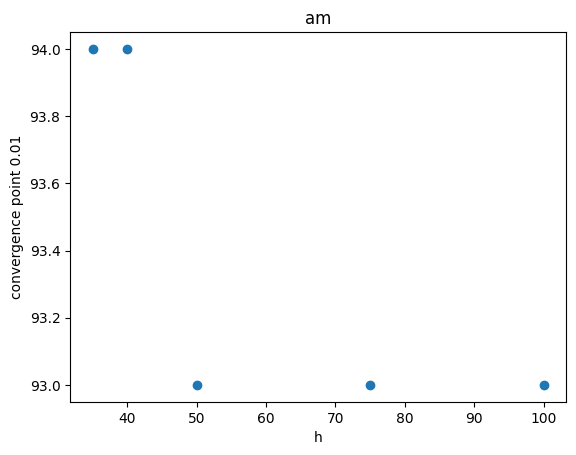

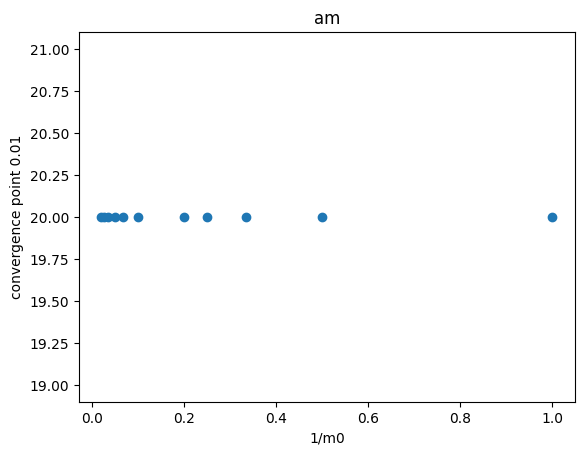

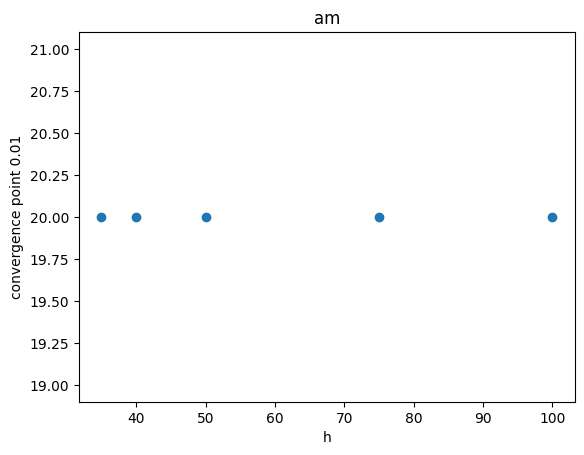

In [16]:
hydro = "am"
plot_hydros_against_1(all_prob_sets[0], hydro, 0.01, dim1s["(1/m0)"], xlabel = "1/m0")
plot_hydros_against_1(all_prob_sets[1], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[2], hydro, 0.01, dim1s["(1/m0)"], xlabel = "1/m0")
plot_hydros_against_1(all_prob_sets[3], hydro, 0.01, dim1s["h"], xlabel = "h")

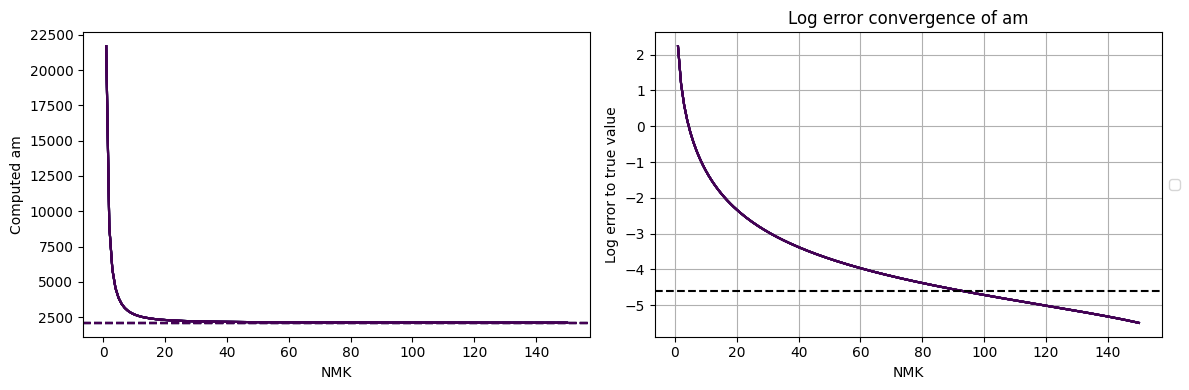

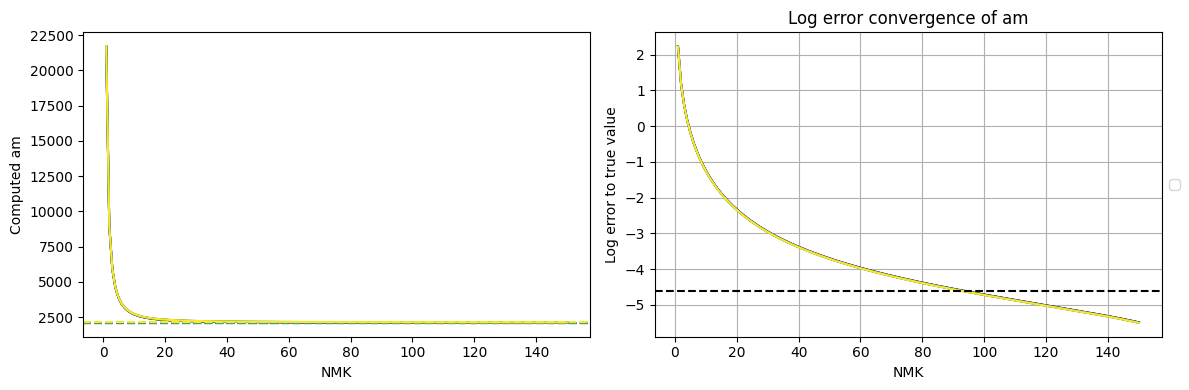

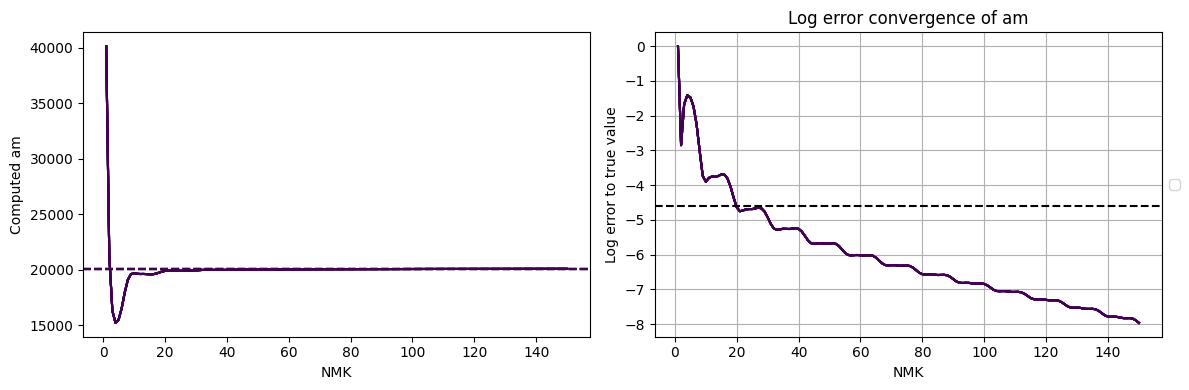

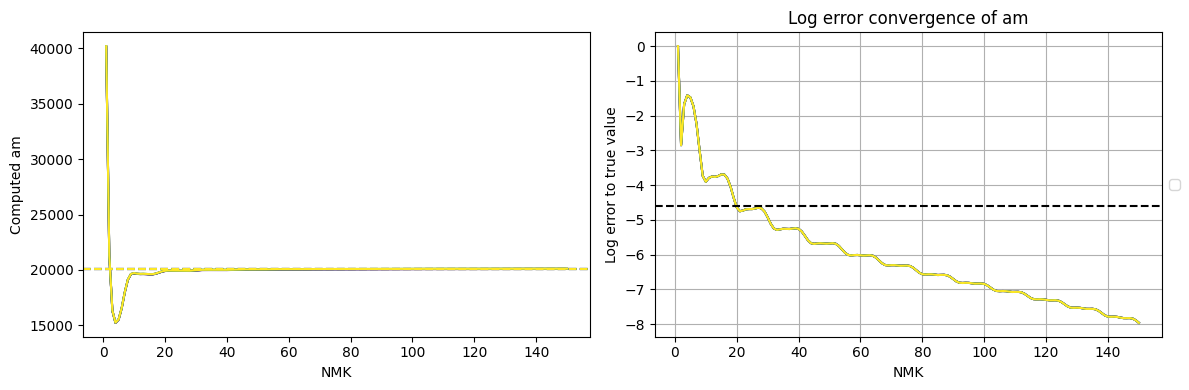

In [18]:
hydro = "am"
for subset in all_prob_sets:
  formatted_data = many_data_dicts_to_convergence_plot_data(subset, all_m0s = True)
  if len(subset) == 1: f = dim1s["(1/m0)"]
  else: f = dim1s["h"]
  colors = color_by_f_value(f, subset, cmap = "viridis", all_m0s = True)
  plot_set_convergence_and_log(formatted_data, hydro, colors = colors, show_error = True, trunc = 0)